In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import pandas as pd

# Provide the full path to your .xlsx file
file_path = 'E:\Projects\BI-Project\ML_social_media_engagement_data.csv'

# Load the dataset
df = pd.read_excel(file_path)

# Check the first few rows of the dataset
print(df.head())

<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19608\3185471740.py:4: SyntaxWarning: invalid escape sequence '\P'
  file_path = 'E:\Projects\BI-Project\ML_social_media_engagement_data.csv'


    Platform                               Post ID Post Type  \
0   LinkedIn  d49dadb4-fc1e-4775-88ad-d60b75cf5123     Video   
1  Instagram  16ce29c5-2dc7-478f-9814-a86754f3ce8b     Video   
2  Instagram  6a6cc741-72f4-4111-95a0-c5ee04a175a8     Video   
3    Twitter  0b5a3e70-c556-43cb-ad4f-a1d0003348bc     Image   
4   Facebook  a7d3e958-e2fe-411e-a24a-b96e821fc050      Link   

                                        Post Content          Post Timestamp  \
0                     Want that according same wish. 2021-04-23 08:19:49.255   
1                       Increase fast partner south. 2023-07-30 06:40:06.356   
2         Lawyer behavior born window couple sister. 2021-12-05 03:56:53.212   
3                          Street great decade must. 2021-09-28 20:39:00.228   
4  At clear meeting with reason ground continue c... 2023-02-27 17:51:21.425   

   Likes  Comments  Shares  Impressions  Reach  Engagement Rate  Audience Age  \
0    415        77      85         2619   1842       

In [4]:
for col in df.columns:
    print("\n",df[col].value_counts())
    print(df[col].unique())


 Platform
Twitter      25160
LinkedIn     25126
Facebook     24879
Instagram    24835
Name: count, dtype: int64
['LinkedIn' 'Instagram' 'Twitter' 'Facebook']

 Post ID
d49dadb4-fc1e-4775-88ad-d60b75cf5123    1
d7eee2f3-674f-4c10-b9ec-3b48a26ed9e3    1
63f113a7-3712-4e73-9838-1c4ec1186322    1
7f5526bb-37bb-48e6-8dae-3abc13870bb6    1
3936121f-016c-4be3-91ff-9afdc2138f8b    1
                                       ..
f367162d-2075-4bf5-94c2-07d4ea3d83b4    1
5c6a49f1-a875-42e8-970e-3e4326ba0a09    1
cf18719e-89ef-4dbe-868a-9bf376efaa23    1
aeee26b5-834c-499c-9677-251b446df2c7    1
6b1406b0-adca-43e5-abde-799746a9b50a    1
Name: count, Length: 100000, dtype: int64
['d49dadb4-fc1e-4775-88ad-d60b75cf5123'
 '16ce29c5-2dc7-478f-9814-a86754f3ce8b'
 '6a6cc741-72f4-4111-95a0-c5ee04a175a8' ...
 '43cd806e-704b-4718-9924-2555c189f8b2'
 '3485970a-0f34-4304-a60a-f4e3de8e1917'
 '6b1406b0-adca-43e5-abde-799746a9b50a']

 Post Type
Video    33384
Link     33338
Image    33278
Name: count, dtype: int64

In [5]:
df_backup = df.copy()  # Keep a copy before dropping "Post ID"


In [6]:
to_drop = ["Post Content","Post Timestamp","Influencer ID","Campaign ID","Audience Gender","Audience Location","Audience Interests","Sentiment"]
df = df.drop(columns=to_drop)
df

  

,Platform,Post ID,Post Type,Likes,Comments,Shares,Impressions,Reach,Engagement Rate,Audience Age
0,LinkedIn,d49dadb4-fc1e-4775-88ad-d60b75cf5123,Video,415,77,85,2619,1842,31.32,29
1,Instagram,16ce29c5-2dc7-478f-9814-a86754f3ce8b,Video,908,125,85,1223,3884,28.78,48
2,Instagram,6a6cc741-72f4-4111-95a0-c5ee04a175a8,Video,412,419,58,2165,849,104.71,55
3,Twitter,0b5a3e70-c556-43cb-ad4f-a1d0003348bc,Image,667,153,29,7191,3519,24.13,54
4,Facebook,a7d3e958-e2fe-411e-a24a-b96e821fc050,Link,659,215,34,3312,2032,44.69,33
...,...,...,...,...,...,...,...,...,...,...
99995,LinkedIn,26534a4f-0cb6-4bb3-b852-d1cadc15584e,Link,555,491,15,4685,2377,44.64,62
99996,Facebook,df9577d4-9338-4f41-99f9-8e8f1e34febd,Link,341,76,76,4448,2605,18.93,35
99997,LinkedIn,43cd806e-704b-4718-9924-2555c189f8b2,Link,442,155,75,8746,4616,14.56,38
99998,Instagram,3485970a-0f34-4304-a60a-f4e3de8e1917,Link,313,417,140,5487,608,143.09,39


In [7]:
df = pd.get_dummies(df, columns=["Platform"], dtype=int)
df = pd.get_dummies(df, columns=["Post Type"], dtype=int)

In [8]:
df.head()

# Move "Engagement Rate" to the last column
df = df[[col for col in df.columns if col != "Engagement Rate"] + ["Engagement Rate"]]

df.head()

,Post ID,Likes,Comments,Shares,Impressions,Reach,Audience Age,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Twitter,Post Type_Image,Post Type_Link,Post Type_Video,Engagement Rate
0,d49dadb4-fc1e-4775-88ad-d60b75cf5123,415,77,85,2619,1842,29,0,0,1,0,0,0,1,31.32
1,16ce29c5-2dc7-478f-9814-a86754f3ce8b,908,125,85,1223,3884,48,0,1,0,0,0,0,1,28.78
2,6a6cc741-72f4-4111-95a0-c5ee04a175a8,412,419,58,2165,849,55,0,1,0,0,0,0,1,104.71
3,0b5a3e70-c556-43cb-ad4f-a1d0003348bc,667,153,29,7191,3519,54,0,0,0,1,1,0,0,24.13
4,a7d3e958-e2fe-411e-a24a-b96e821fc050,659,215,34,3312,2032,33,1,0,0,0,0,1,0,44.69


In [9]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['Likes', 'Comments', 'Shares', 'Impressions', 'Reach', 'Audience Age', 'Engagement Rate']] = scaler.fit_transform(
    df_scaled[['Likes', 'Comments', 'Shares', 'Impressions', 'Reach', 'Audience Age', 'Engagement Rate']]
)

In [10]:
df

,Post ID,Likes,Comments,Shares,Impressions,Reach,Audience Age,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Twitter,Post Type_Image,Post Type_Link,Post Type_Video,Engagement Rate
0,d49dadb4-fc1e-4775-88ad-d60b75cf5123,415,77,85,2619,1842,29,0,0,1,0,0,0,1,31.32
1,16ce29c5-2dc7-478f-9814-a86754f3ce8b,908,125,85,1223,3884,48,0,1,0,0,0,0,1,28.78
2,6a6cc741-72f4-4111-95a0-c5ee04a175a8,412,419,58,2165,849,55,0,1,0,0,0,0,1,104.71
3,0b5a3e70-c556-43cb-ad4f-a1d0003348bc,667,153,29,7191,3519,54,0,0,0,1,1,0,0,24.13
4,a7d3e958-e2fe-411e-a24a-b96e821fc050,659,215,34,3312,2032,33,1,0,0,0,0,1,0,44.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,26534a4f-0cb6-4bb3-b852-d1cadc15584e,555,491,15,4685,2377,62,0,0,1,0,0,1,0,44.64
99996,df9577d4-9338-4f41-99f9-8e8f1e34febd,341,76,76,4448,2605,35,1,0,0,0,0,1,0,18.93
99997,43cd806e-704b-4718-9924-2555c189f8b2,442,155,75,8746,4616,38,0,0,1,0,0,1,0,14.56
99998,3485970a-0f34-4304-a60a-f4e3de8e1917,313,417,140,5487,608,39,0,1,0,0,0,1,0,143.09


In [11]:
train, test = np.split(df.sample(frac=1), [int(0.8 * len(df))])

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [12]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, Y = ros.fit_resample(X, Y)

  data = np.hstack((X, np.reshape(Y, (-1, 1))))

  return data, X, Y

In [13]:
df 

,Post ID,Likes,Comments,Shares,Impressions,Reach,Audience Age,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Twitter,Post Type_Image,Post Type_Link,Post Type_Video,Engagement Rate
0,d49dadb4-fc1e-4775-88ad-d60b75cf5123,415,77,85,2619,1842,29,0,0,1,0,0,0,1,31.32
1,16ce29c5-2dc7-478f-9814-a86754f3ce8b,908,125,85,1223,3884,48,0,1,0,0,0,0,1,28.78
2,6a6cc741-72f4-4111-95a0-c5ee04a175a8,412,419,58,2165,849,55,0,1,0,0,0,0,1,104.71
3,0b5a3e70-c556-43cb-ad4f-a1d0003348bc,667,153,29,7191,3519,54,0,0,0,1,1,0,0,24.13
4,a7d3e958-e2fe-411e-a24a-b96e821fc050,659,215,34,3312,2032,33,1,0,0,0,0,1,0,44.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,26534a4f-0cb6-4bb3-b852-d1cadc15584e,555,491,15,4685,2377,62,0,0,1,0,0,1,0,44.64
99996,df9577d4-9338-4f41-99f9-8e8f1e34febd,341,76,76,4448,2605,35,1,0,0,0,0,1,0,18.93
99997,43cd806e-704b-4718-9924-2555c189f8b2,442,155,75,8746,4616,38,0,0,1,0,0,1,0,14.56
99998,3485970a-0f34-4304-a60a-f4e3de8e1917,313,417,140,5487,608,39,0,1,0,0,0,1,0,143.09


In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Engagement Rate',"Post ID"])
y = df['Engagement Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
df

,Post ID,Likes,Comments,Shares,Impressions,Reach,Audience Age,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Twitter,Post Type_Image,Post Type_Link,Post Type_Video,Engagement Rate
0,d49dadb4-fc1e-4775-88ad-d60b75cf5123,415,77,85,2619,1842,29,0,0,1,0,0,0,1,31.32
1,16ce29c5-2dc7-478f-9814-a86754f3ce8b,908,125,85,1223,3884,48,0,1,0,0,0,0,1,28.78
2,6a6cc741-72f4-4111-95a0-c5ee04a175a8,412,419,58,2165,849,55,0,1,0,0,0,0,1,104.71
3,0b5a3e70-c556-43cb-ad4f-a1d0003348bc,667,153,29,7191,3519,54,0,0,0,1,1,0,0,24.13
4,a7d3e958-e2fe-411e-a24a-b96e821fc050,659,215,34,3312,2032,33,1,0,0,0,0,1,0,44.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,26534a4f-0cb6-4bb3-b852-d1cadc15584e,555,491,15,4685,2377,62,0,0,1,0,0,1,0,44.64
99996,df9577d4-9338-4f41-99f9-8e8f1e34febd,341,76,76,4448,2605,35,1,0,0,0,0,1,0,18.93
99997,43cd806e-704b-4718-9924-2555c189f8b2,442,155,75,8746,4616,38,0,0,1,0,0,1,0,14.56
99998,3485970a-0f34-4304-a60a-f4e3de8e1917,313,417,140,5487,608,39,0,1,0,0,0,1,0,143.09


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LR = LinearRegression()
LR.fit(X_train, y_train)


LinearRegression()

In [19]:
# Make predictions
ypred = LR.predict(X_test)

# Evaluate Regression Performance
print("R² Score:", r2_score(y_test, ypred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, ypred))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, ypred, squared=False))

R² Score: 0.6943834451144698
Mean Absolute Error (MAE): 14.679580239106098
Root Mean Squared Error (RMSE): 21.081953236697064


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [20]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [25]:
# Make predictions
ypred = RF.predict(X_test) 

# Evaluate Regression Performance``
print("R² Score:", r2_score(y_test, ypred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, ypred))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, ypred, squared=False))

R² Score: 0.9981388501616745
Mean Absolute Error (MAE): 0.8952066850000003
Root Mean Squared Error (RMSE): 1.645178696761997


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(RF, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean CV R² Score:", cv_scores.mean())


Cross-Validation R² Scores: [0.99791837 0.99785922 0.99789605 0.99798509 0.99795038]
Mean CV R² Score: 0.9979218223754721


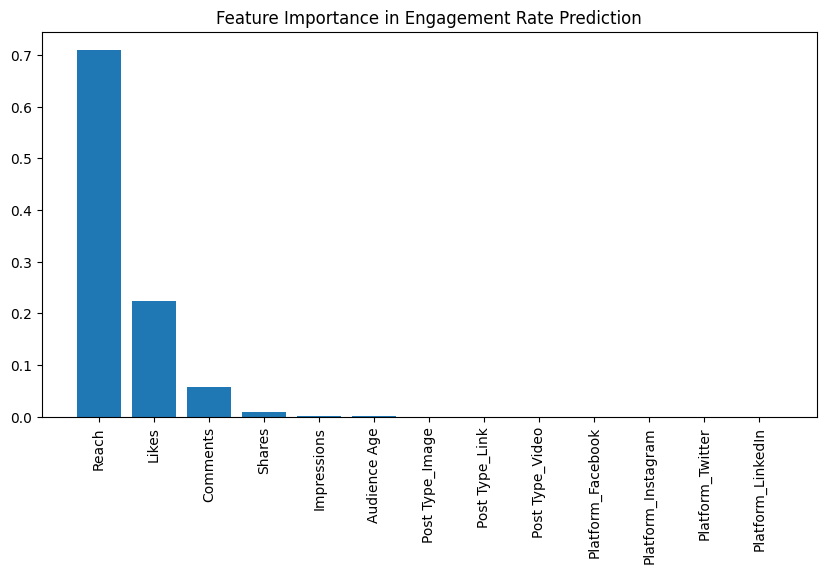

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = RF.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]  # Sort in descending order

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.title("Feature Importance in Engagement Rate Prediction")
plt.show()


optimizing the RANDOM FOREST 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


Best Model for Random Forest

In [ ]:
df

,Post ID,Likes,Comments,Shares,Impressions,Reach,Audience Age,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Twitter,Post Type_Image,Post Type_Link,Post Type_Video,Engagement Rate
0,d49dadb4-fc1e-4775-88ad-d60b75cf5123,415,77,85,2619,1842,29,0,0,1,0,0,0,1,31.32
1,16ce29c5-2dc7-478f-9814-a86754f3ce8b,908,125,85,1223,3884,48,0,1,0,0,0,0,1,28.78
2,6a6cc741-72f4-4111-95a0-c5ee04a175a8,412,419,58,2165,849,55,0,1,0,0,0,0,1,104.71
3,0b5a3e70-c556-43cb-ad4f-a1d0003348bc,667,153,29,7191,3519,54,0,0,0,1,1,0,0,24.13
4,a7d3e958-e2fe-411e-a24a-b96e821fc050,659,215,34,3312,2032,33,1,0,0,0,0,1,0,44.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,26534a4f-0cb6-4bb3-b852-d1cadc15584e,555,491,15,4685,2377,62,0,0,1,0,0,1,0,44.64
99996,df9577d4-9338-4f41-99f9-8e8f1e34febd,341,76,76,4448,2605,35,1,0,0,0,0,1,0,18.93
99997,43cd806e-704b-4718-9924-2555c189f8b2,442,155,75,8746,4616,38,0,0,1,0,0,1,0,14.56
99998,3485970a-0f34-4304-a60a-f4e3de8e1917,313,417,140,5487,608,39,0,1,0,0,0,1,0,143.09


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train optimized Random Forest
final_model = RandomForestRegressor(
    max_depth=None,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)
final_model.fit(X_train, y_train)

# Predict Engagement Rate
df["Predicted Engagement Rate"] = final_model.predict(df.drop(columns=["Engagement Rate","Post ID"]))

# Save Predictions
df.to_csv("predicted_engagement_V2.csv", index=False)

print("✅ Final model trained & predictions saved!")


✅ Final model trained & predictions saved!


I love the way you respond an give answers. keep it up

In [ ]:
df_backup


,Likes,Comments,Shares,Impressions,Reach,Audience Age,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Twitter,Post Type_Image,Post Type_Link,Post Type_Video,Engagement Rate
0,415,77,85,2619,1842,29,0,0,1,0,0,0,1,31.32
1,908,125,85,1223,3884,48,0,1,0,0,0,0,1,28.78
2,412,419,58,2165,849,55,0,1,0,0,0,0,1,104.71
3,667,153,29,7191,3519,54,0,0,0,1,1,0,0,24.13
4,659,215,34,3312,2032,33,1,0,0,0,0,1,0,44.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,555,491,15,4685,2377,62,0,0,1,0,0,1,0,44.64
99996,341,76,76,4448,2605,35,1,0,0,0,0,1,0,18.93
99997,442,155,75,8746,4616,38,0,0,1,0,0,1,0,14.56
99998,313,417,140,5487,608,39,0,1,0,0,0,1,0,143.09
